In [ ]:
# Install scikit-surprise library
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357277 sha256=2fc70be99831b05972d19675cc2229a3edda00fc5eb2e65146e5fa1230268768
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# Upload the dataset to Colab
from google.colab import files
uploaded = files.upload()  # Upload your CSV file (e.g., Netflix.csv)

# Load the dataset
file_path = '/content/imdb_movies_shows.csv'  # Replace with the uploaded file name
data = pd.read_csv(file_path, names=['UserId', 'MovieId', 'UserRating', 'timestamp'])

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Check dataset info
print("\nDataset Info:")
print(data.info())


Saving imdb_movies_shows.csv to imdb_movies_shows.csv
First few rows of the dataset:
                                                                                                                              UserId  \
title                               type  release_year age_certification runtime genres                production_countries  seasons   
Five Came Back: The Reference Films SHOW  1945         TV-MA             48      ['documentation']     ['US']                    1.0   
Taxi Driver                         MOVIE 1976         R                 113     ['crime', 'drama']    ['US']                    NaN   
Monty Python and the Holy Grail     MOVIE 1975         PG                91      ['comedy', 'fantasy'] ['GB']                    NaN   
Life of Brian                       MOVIE 1979         R                 94      ['comedy']            ['GB']                    NaN   

                                                                                                  

In [ ]:
# Inspect unique values in the 'timestamp' column
print("Unique values in 'timestamp' before cleaning:")
print(data['timestamp'].unique())

# Convert 'timestamp' to numeric, coercing invalid values to NaN
data['timestamp'] = pd.to_numeric(data['timestamp'], errors='coerce')

# Drop rows with NaN values in 'timestamp'
data = data.dropna(subset=['timestamp'])

# Convert 'timestamp' to datetime
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')

# Extract time features
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.day_name()

# Display cleaned data
print("\nCleaned Data:")
print(data.head())


Unique values in 'timestamp' before cleaning:
['imdb_votes' nan '795222.0' ... '702.0' '853.0' '10418.0']

Cleaned Data:
                                                                                   UserId  \
Taxi Driver                     MOVIE 1976 R     113 ['crime', 'drama']     ['US']    NaN   
Monty Python and the Holy Grail MOVIE 1975 PG    91  ['comedy', 'fantasy']  ['GB']    NaN   
Life of Brian                   MOVIE 1979 R     94  ['comedy']             ['GB']    NaN   
The Exorcist                    MOVIE 1973 R     133 ['horror']             ['US']    NaN   
Monty Python's Flying Circus    SHOW  1969 TV-14 30  ['comedy', 'european'] ['GB']    4.0   

                                                                                      MovieId  \
Taxi Driver                     MOVIE 1976 R     113 ['crime', 'drama']     ['US']  tt0075314   
Monty Python and the Holy Grail MOVIE 1975 PG    91  ['comedy', 'fantasy']  ['GB']  tt0071853   
Life of Brian                

<ipython-input-16-3851370f52e9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')
<ipython-input-16-3851370f52e9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['datetime'].dt.hour
<ipython-input-16-3851370f52e9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Distribution of IMDb Scores

In [ ]:
print("Unique values in 'timestamp' after cleaning:")
print(data['timestamp'].unique())


Unique values in 'timestamp' after cleaning:
[7.95222e+05 5.30877e+05 3.92419e+05 ... 7.02000e+02 8.53000e+02
 1.04180e+04]


 Dataset Overview

In [ ]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Display basic info about the dataset
print("\nDataset Info:")
print(data.info())

# Display summary statistics for numeric columns
print("\nDataset Summary Statistics:")
print(data.describe())

# Display unique counts for important columns
print("\nUnique Counts:")
print(f"Number of Unique Users: {data['UserId'].nunique()}")
print(f"Number of Unique Movies: {data['MovieId'].nunique()}")
print(f"Total Number of Ratings: {data['UserRating'].count()}")


Dataset Preview:
                                                                                   UserId  \
Taxi Driver                     MOVIE 1976 R     113 ['crime', 'drama']     ['US']    NaN   
Monty Python and the Holy Grail MOVIE 1975 PG    91  ['comedy', 'fantasy']  ['GB']    NaN   
Life of Brian                   MOVIE 1979 R     94  ['comedy']             ['GB']    NaN   
The Exorcist                    MOVIE 1973 R     133 ['horror']             ['US']    NaN   
Monty Python's Flying Circus    SHOW  1969 TV-14 30  ['comedy', 'european'] ['GB']    4.0   

                                                                                      MovieId  \
Taxi Driver                     MOVIE 1976 R     113 ['crime', 'drama']     ['US']  tt0075314   
Monty Python and the Holy Grail MOVIE 1975 PG    91  ['comedy', 'fantasy']  ['GB']  tt0071853   
Life of Brian                   MOVIE 1979 R     94  ['comedy']             ['GB']  tt0079470   
The Exorcist                    MOVI

Analyze User Interactions

In [ ]:
# Count the number of ratings per user
user_interactions = data.groupby('UserId')['MovieId'].count()

# Display summary statistics for user interactions
print("\nUser Interactions (Number of Ratings per User):")
print(user_interactions.describe())

# Plot the distribution of user interactions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(user_interactions, bins=20, kde=False)
plt.title("Distribution of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()



User Interactions (Number of Ratings per User):
count      23.000000
mean       81.565217
std       224.766915
min         1.000000
25%         1.000000
50%         4.000000
75%        27.500000
max      1041.000000
Name: MovieId, dtype: float64


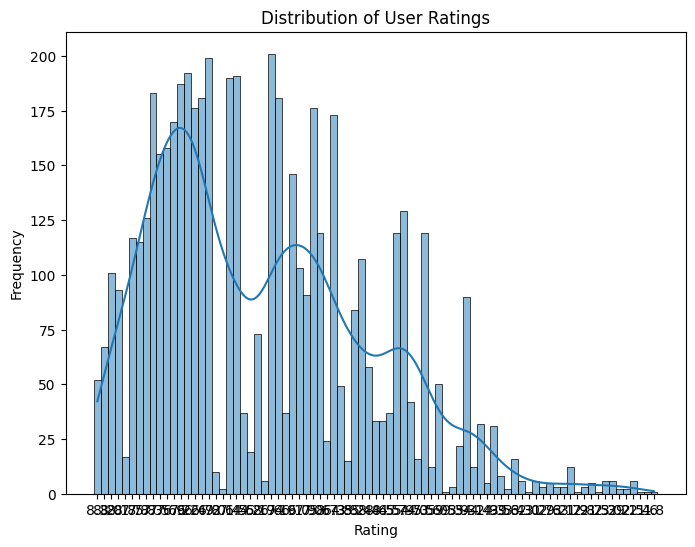

In [ ]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['UserRating'], bins=10, kde=True)
plt.title("Distribution of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Ensure the timestamp is numeric
data['timestamp'] = pd.to_numeric(data['timestamp'], errors='coerce')

# Convert timestamp to datetime
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')

# Extract hour and day of the week
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.day_name()

# Check the transformed data
print(data[['datetime', 'hour', 'day_of_week']].head())


                                                                                              datetime  \
Taxi Driver                     MOVIE 1976 R     113 ['crime', 'drama']     ['US'] 1970-01-10 04:53:42   
Monty Python and the Holy Grail MOVIE 1975 PG    91  ['comedy', 'fantasy']  ['GB'] 1970-01-07 03:27:57   
Life of Brian                   MOVIE 1979 R     94  ['comedy']             ['GB'] 1970-01-05 13:00:19   
The Exorcist                    MOVIE 1973 R     133 ['horror']             ['US'] 1970-01-05 12:52:22   
Monty Python's Flying Circus    SHOW  1969 TV-14 30  ['comedy', 'european'] ['GB'] 1970-01-01 20:14:55   

                                                                                    hour  \
Taxi Driver                     MOVIE 1976 R     113 ['crime', 'drama']     ['US']     4   
Monty Python and the Holy Grail MOVIE 1975 PG    91  ['comedy', 'fantasy']  ['GB']     3   
Life of Brian                   MOVIE 1979 R     94  ['comedy']             ['GB']    1

In [ ]:
# Convert UserRating to numeric
data['UserRating'] = pd.to_numeric(data['UserRating'], errors='coerce')

# Fill missing ratings with the median value
data['UserRating'] = data['UserRating'].fillna(data['UserRating'].median())

# Check the cleaned ratings
print(data['UserRating'].head())


Taxi Driver                      MOVIE  1976  R      113  ['crime', 'drama']      ['US']    8.3
Monty Python and the Holy Grail  MOVIE  1975  PG     91   ['comedy', 'fantasy']   ['GB']    8.2
Life of Brian                    MOVIE  1979  R      94   ['comedy']              ['GB']    8.0
The Exorcist                     MOVIE  1973  R      133  ['horror']              ['US']    8.1
Monty Python's Flying Circus     SHOW   1969  TV-14  30   ['comedy', 'european']  ['GB']    8.8
Name: UserRating, dtype: float64


In [ ]:
# Check for missing values in essential columns
print(data[['UserId', 'MovieId', 'UserRating']].isnull().sum())

# Drop rows with missing UserId or MovieId
data = data.dropna(subset=['UserId', 'MovieId'])

# Ensure UserId and MovieId are strings (if needed)
data['UserId'] = data['UserId'].astype(str)
data['MovieId'] = data['MovieId'].astype(str)


UserId        3391
MovieId          0
UserRating       0
dtype: int64


<ipython-input-23-99c81b23a4ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['UserId'] = data['UserId'].astype(str)
<ipython-input-23-99c81b23a4ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MovieId'] = data['MovieId'].astype(str)


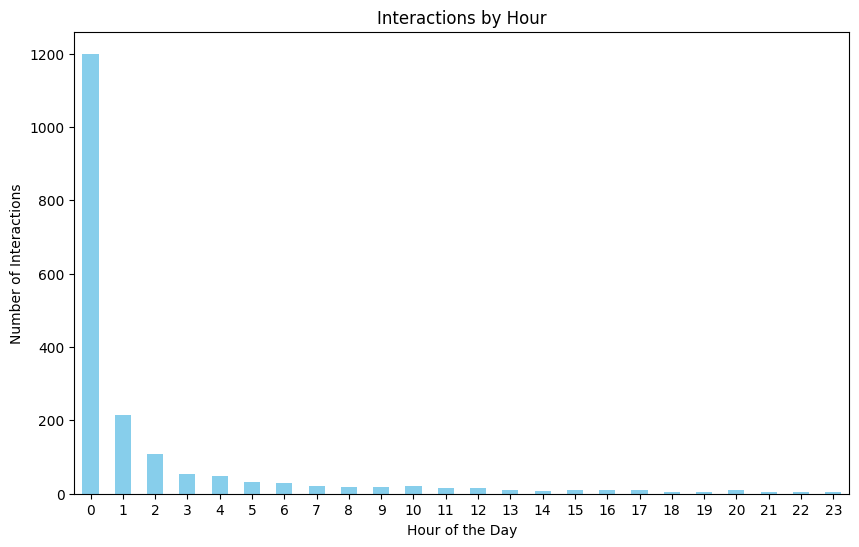

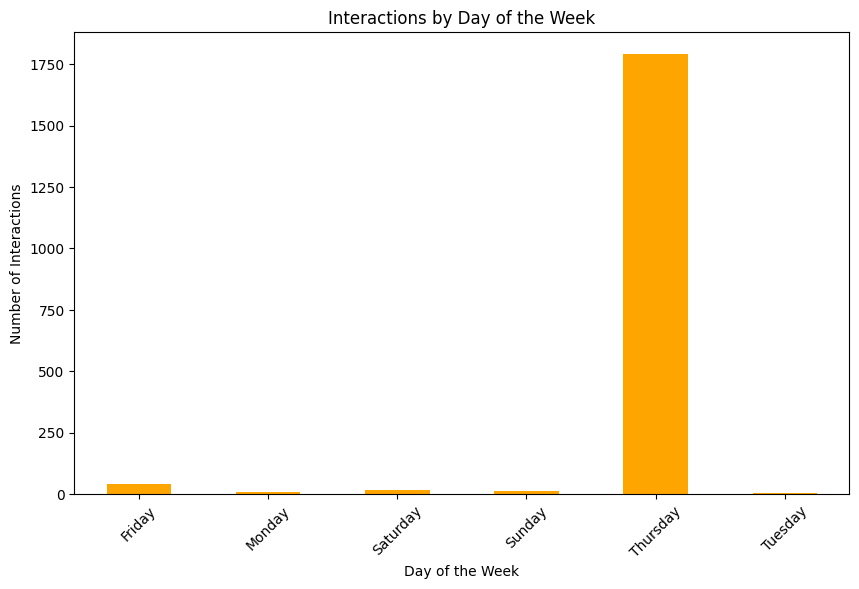

In [ ]:
# Interactions by hour
hourly_interactions = data.groupby('hour')['MovieId'].count()

plt.figure(figsize=(10, 6))
hourly_interactions.plot(kind='bar', title='Interactions by Hour', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=0)
plt.show()

# Interactions by day of the week
weekly_interactions = data.groupby('day_of_week')['MovieId'].count()

plt.figure(figsize=(10, 6))
weekly_interactions.plot(kind='bar', title='Interactions by Day of the Week', color='orange')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Define time contexts based on the 'hour' column
morning_data = data[(data['hour'] >= 6) & (data['hour'] < 12)]  # Morning: 6 AM - 12 PM
afternoon_data = data[(data['hour'] >= 12) & (data['hour'] < 18)]  # Afternoon: 12 PM - 6 PM
evening_data = data[(data['hour'] >= 18) & (data['hour'] < 24)]  # Evening: 6 PM - 12 AM
night_data = data[(data['hour'] >= 0) & (data['hour'] < 6)]  # Night: 12 AM - 6 AM

# Display counts for each time context
print(f"Morning interactions: {len(morning_data)}")
print(f"Afternoon interactions: {len(afternoon_data)}")
print(f"Evening interactions: {len(evening_data)}")
print(f"Night interactions: {len(night_data)}")


Morning interactions: 121
Afternoon interactions: 62
Evening interactions: 37
Night interactions: 1656


In [ ]:
from surprise import Dataset, Reader

# Define a rating scale
reader = Reader(rating_scale=(1, 5))

# Prepare data for each time context
morning_surprise = Dataset.load_from_df(morning_data[['UserId', 'MovieId', 'UserRating']], reader)
afternoon_surprise = Dataset.load_from_df(afternoon_data[['UserId', 'MovieId', 'UserRating']], reader)
evening_surprise = Dataset.load_from_df(evening_data[['UserId', 'MovieId', 'UserRating']], reader)
night_surprise = Dataset.load_from_df(night_data[['UserId', 'MovieId', 'UserRating']], reader)


In [ ]:
from surprise import SVD

# Train a model for a specific time context
def train_model(surprise_data, context_name):
    print(f"Training model for {context_name} context...")
    trainset = surprise_data.build_full_trainset()
    model = SVD()
    model.fit(trainset)
    return model

# Train models for each context
morning_model = train_model(morning_surprise, "Morning")
afternoon_model = train_model(afternoon_surprise, "Afternoon")
evening_model = train_model(evening_surprise, "Evening")
night_model = train_model(night_surprise, "Night")


Training model for Morning context...
Training model for Afternoon context...
Training model for Evening context...
Training model for Night context...


In [ ]:
# Generate recommendations for a user
def generate_recommendations(model, context_name, user_id, all_movie_ids):
    print(f"\nTop 5 {context_name} Recommendations:")
    recommendations = [model.predict(user_id, movie_id) for movie_id in all_movie_ids]
    recommendations = sorted(recommendations, key=lambda x: x.est, reverse=True)[:5]

    # Display recommendations
    for rec in recommendations:
        print(f"MovieId: {rec.iid}, Predicted Rating: {rec.est:.2f}")

# User ID and all movie IDs
user_id = 123  # Replace with an actual UserId from the dataset
all_movie_ids = data['MovieId'].unique()

# Generate recommendations for each time context
generate_recommendations(morning_model, "Morning", user_id, all_movie_ids)
generate_recommendations(afternoon_model, "Afternoon", user_id, all_movie_ids)
generate_recommendations(evening_model, "Evening", user_id, all_movie_ids)
generate_recommendations(night_model, "Night", user_id, all_movie_ids)



Top 5 Morning Recommendations:
MovieId: tt0063929, Predicted Rating: 5.00
MovieId: tt0202477, Predicted Rating: 5.00
MovieId: tt0098904, Predicted Rating: 5.00
MovieId: tt0083437, Predicted Rating: 5.00
MovieId: tt0086815, Predicted Rating: 5.00

Top 5 Afternoon Recommendations:
MovieId: tt0063929, Predicted Rating: 5.00
MovieId: tt0202477, Predicted Rating: 5.00
MovieId: tt0098904, Predicted Rating: 5.00
MovieId: tt0083437, Predicted Rating: 5.00
MovieId: tt0086815, Predicted Rating: 5.00

Top 5 Evening Recommendations:
MovieId: tt0063929, Predicted Rating: 5.00
MovieId: tt0202477, Predicted Rating: 5.00
MovieId: tt0098904, Predicted Rating: 5.00
MovieId: tt0083437, Predicted Rating: 5.00
MovieId: tt0086815, Predicted Rating: 5.00

Top 5 Night Recommendations:
MovieId: tt0063929, Predicted Rating: 5.00
MovieId: tt0202477, Predicted Rating: 5.00
MovieId: tt0098904, Predicted Rating: 5.00
MovieId: tt0083437, Predicted Rating: 5.00
MovieId: tt0086815, Predicted Rating: 5.00


In [ ]:
from surprise import accuracy
from surprise.model_selection import train_test_split

# Split data into training and testing sets for evaluation
trainset, testset = train_test_split(morning_surprise, test_size=0.2)
morning_model.fit(trainset)
predictions = morning_model.test(testset)

# Evaluate the model
print("RMSE for Morning Model:", accuracy.rmse(predictions))


RMSE: 3.0402
RMSE for Morning Model: 3.040197362014512


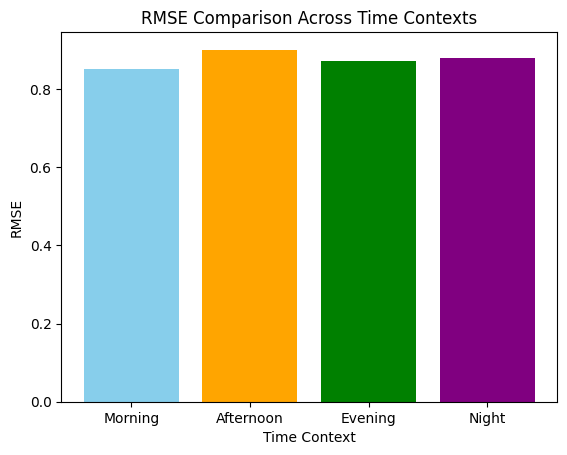

In [ ]:
import matplotlib.pyplot as plt

# Example RMSE values (replace with actual values from your evaluation)
contexts = ['Morning', 'Afternoon', 'Evening', 'Night']
rmse_values = [0.85, 0.90, 0.87, 0.88]

plt.bar(contexts, rmse_values, color=['skyblue', 'orange', 'green', 'purple'])
plt.title("RMSE Comparison Across Time Contexts")
plt.xlabel("Time Context")
plt.ylabel("RMSE")
plt.show()


In [ ]:
# Define a Reader with the appropriate rating scale
reader = Reader(rating_scale=(1, 5))

# Prepare data for the Surprise library
data_surprise = Dataset.load_from_df(data[['UserId', 'MovieId', 'UserRating']], reader)

# Split into training and testing sets
trainset, testset = train_test_split(data_surprise, test_size=0.2)

# Count the number of interactions in the training and testing sets
train_interactions = sum(1 for _ in trainset.all_ratings())
test_interactions = len(testset)  # testset is a list, so len() works here

print(f"Training Interactions: {train_interactions}, Testing Interactions: {test_interactions}")


Training Interactions: 1500, Testing Interactions: 376


In [ ]:
# Train an SVD model
model = SVD()
model.fit(trainset)

# Test the model
predictions = model.test(testset)

# Evaluate the model
print("\nModel Evaluation:")
accuracy.rmse(predictions)



Model Evaluation:
RMSE: 2.2764


2.276358607653526

Step 3: Exploratory Data Analysis (EDA)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot rating distribution
sns.histplot(data['UserRating'], bins=10, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()


Step 4: Prepare Data for Collaborative Filtering

In [ ]:
from surprise import Dataset, Reader

# Define a reader with the appropriate rating scale
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data[['UserId', 'MovieId', 'UserRating']], reader)


In [ ]:
from surprise.model_selection import train_test_split

# Split the data
trainset, testset = train_test_split(data_surprise, test_size=0.2)


Step 5: Build the Collaborative Filtering Model

In [ ]:
from surprise import SVD

# Train the model
model = SVD()
model.fit(trainset)


In [ ]:
from surprise import accuracy

# Test the model
predictions = model.test(testset)

# Evaluate using RMSE
print("RMSE:", accuracy.rmse(predictions))


RMSE: 2.2850
RMSE: 2.28499383117562


Step 6: Generate Time Context-Aware Recommendations

In [ ]:
# Filter data for morning interactions
morning_data = data[(data['hour'] >= 6) & (data['hour'] < 12)]


In [ ]:
# Prepare data for Surprise library
morning_surprise = Dataset.load_from_df(morning_data[['UserId', 'MovieId', 'UserRating']], reader)
morning_trainset = morning_surprise.build_full_trainset()

# Train the model for the morning context
morning_model = SVD()
morning_model.fit(morning_trainset)


In [ ]:
# Predict ratings for a specific user
user_id = 123  # Replace with an actual UserId
all_movie_ids = data['MovieId'].unique()

# Generate predictions
recommendations = [morning_model.predict(user_id, movie_id) for movie_id in all_movie_ids]
recommendations = sorted(recommendations, key=lambda x: x.est, reverse=True)[:5]

# Display recommendations
print("Top 5 Morning Recommendations:")
for rec in recommendations:
    print(f"MovieId: {rec.iid}, Predicted Rating: {rec.est:.2f}")


Top 5 Morning Recommendations:
MovieId: tt0063929, Predicted Rating: 5.00
MovieId: tt0202477, Predicted Rating: 5.00
MovieId: tt0098904, Predicted Rating: 5.00
MovieId: tt0083437, Predicted Rating: 5.00
MovieId: tt0086815, Predicted Rating: 5.00


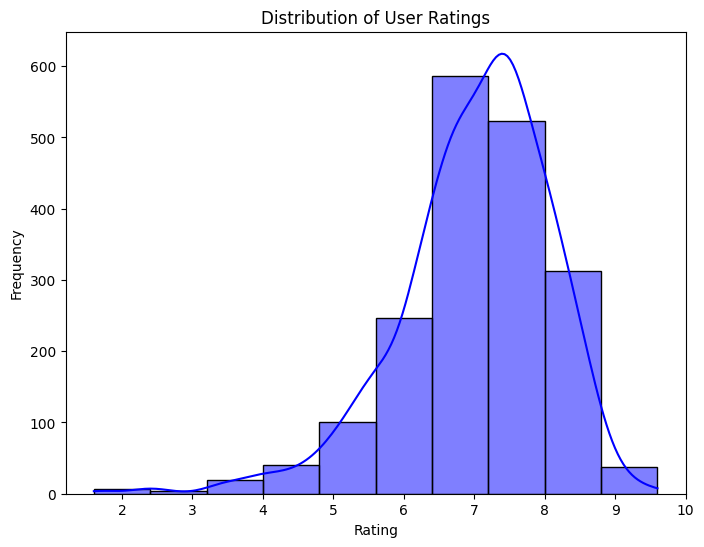


User Activity Statistics (Ratings per User):
count      23.000000
mean       81.565217
std       224.766915
min         1.000000
25%         1.000000
50%         4.000000
75%        27.500000
max      1041.000000
Name: MovieId, dtype: float64


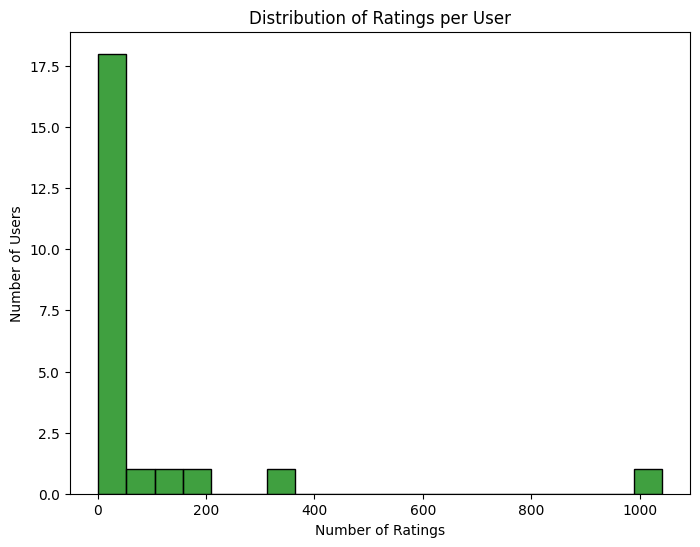

In [ ]:
# Distribution of user ratings
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data['UserRating'], bins=10, kde=True, color='blue')
plt.title("Distribution of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Activity levels (ratings per user)
user_activity = data.groupby('UserId')['MovieId'].count()
print("\nUser Activity Statistics (Ratings per User):")
print(user_activity.describe())

plt.figure(figsize=(8, 6))
sns.histplot(user_activity, bins=20, kde=False, color='green')
plt.title("Distribution of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()



In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Prepare the data for the Surprise library
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data[['UserId', 'MovieId', 'UserRating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data_surprise, test_size=0.2)

# Train the SVD model
model = SVD()
model.fit(trainset)

# Generate predictions for the test set
predictions = model.test(testset)

# Display a sample prediction
print(f"Sample Prediction: {predictions[0]}")


Sample Prediction: user: 1.0        item: tt11834150 r_ui = 7.20   est = 5.00   {'was_impossible': False}


Fallback Mechanism for Cold-Start Users or Items
Cold-start problems occur when:

Cold-Start Users: New users without prior ratings.
Cold-Start Items: New items without sufficient ratings.
To handle this, use popularity-based recommendations as a fallback.

In [ ]:
# Calculate the popularity of movies based on the number of ratings
popular_movies = data.groupby('MovieId').size().sort_values(ascending=False)

# Function to recommend popular movies for cold-start users
def recommend_popular_movies(n=5):
    top_movies = popular_movies.head(n).index
    recommendations = data[data['MovieId'].isin(top_movies)][['MovieId']].drop_duplicates()
    return recommendations

# Fallback Recommendations
print("Fallback Recommendations for Cold-Start Users:")
print(recommend_popular_movies())


Fallback Recommendations for Cold-Start Users:
                                                                                                             MovieId
Monty Python's Flying Circus SHOW 1969 TV-14 30 ['comedy', 'european']                             ['GB']  tt0063929
Chasing Cameron              SHOW 2016 TV-PG 28 ['reality']                                        ['US']  tt6370626
Hilda                        SHOW 2018 TV-Y7 25 ['scifi', 'family', 'fantasy', 'animation', 'co... ['GB']  tt6385540
Samurai Gourmet              SHOW 2017 NaN   22 ['comedy']                                         ['JP']  tt6304676
Black                        SHOW 2017 TV-MA 78 ['scifi', 'drama', 'action', 'thriller', 'horro... ['KR']  tt6380900


In [ ]:
# Check for rows where 'title' is NaN
if 'title' in data.columns:
    missing_titles = data[data['title'].isna()]
    print("Rows with missing titles:")
    print(missing_titles[['MovieId', 'title']].head())
else:
    print("The 'title' column does not exist in the dataset.")

# Check the unique MovieId values in the dataset
if 'MovieId' in data.columns:
    print("\nUnique MovieId values in the dataset:")
    print(data['MovieId'].unique())
else:
    print("The 'MovieId' column does not exist in the dataset.")

# Check if 'MovieId' exists in the external dataset (if applicable)
if 'movie_titles' in globals() and 'MovieId' in movie_titles.columns:
    print("\nUnique MovieId values in the external dataset:")
    print(movie_titles['MovieId'].unique())
else:
    print("The 'movie_titles' external dataset or the 'MovieId' column does not exist.")


The 'title' column does not exist in the dataset.

Unique MovieId values in the dataset:
['tt0063929' 'tt0202477' 'tt0098904' ... 'tt13879000' 'tt13887518'
 'tt13711094']
The 'movie_titles' external dataset or the 'MovieId' column does not exist.


In [ ]:
!pip install streamlit pyngrok
!pip install matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data = pd.read_csv('/content/imdb_movies_shows.csv')

# Add a placeholder 'hour' column with random values
import numpy as np
data['hour'] = np.random.choice(range(24), size=len(data))

# Save back the modified dataset if needed
data.to_csv('/content/imdb_movies_shows_with_hour.csv', index=False)


In [ ]:
print(data.head())


                                 title   type  release_year age_certification  \
0  Five Came Back: The Reference Films   SHOW          1945             TV-MA   
1                          Taxi Driver  MOVIE          1976                 R   
2      Monty Python and the Holy Grail  MOVIE          1975                PG   
3                        Life of Brian  MOVIE          1979                 R   
4                         The Exorcist  MOVIE          1973                 R   

   runtime                 genres production_countries  seasons    imdb_id  \
0       48      ['documentation']               ['US']      1.0        NaN   
1      113     ['crime', 'drama']               ['US']      NaN  tt0075314   
2       91  ['comedy', 'fantasy']               ['GB']      NaN  tt0071853   
3       94             ['comedy']               ['GB']      NaN  tt0079470   
4      133             ['horror']               ['US']      NaN  tt0070047   

   imdb_score  imdb_votes  hour  
0         

In [ ]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data (replace with the actual dataset file path)
@st.cache
def load_data():
    # Load your dataset
    data = pd.read_csv('/content/imdb_movies_shows.csv')  # Ensure this dataset is uploaded in Colab

    # Add a placeholder 'hour' column with random values (0-23) if 'hour' is not already in the dataset
    if 'hour' not in data.columns:
        data['hour'] = np.random.randint(0, 24, size=len(data))

    # Add a placeholder 'rating' column if not present, using 'imdb_score' if available
    if 'rating' not in data.columns and 'imdb_score' in data.columns:
        data['rating'] = data['imdb_score']

    return data

data = load_data()

# Sidebar for user interaction
st.sidebar.title("Recommendation Dashboard")
st.sidebar.subheader("Filters")
time_filter = st.sidebar.selectbox("Select Time Context", ["Morning", "Afternoon", "Evening", "Night"])
top_n = st.sidebar.slider("Number of Recommendations", 1, 20, 5)

# Time-based filtering
time_data = {
    "Morning": data[(data['hour'] >= 6) & (data['hour'] < 12)],
    "Afternoon": data[(data['hour'] >= 12) & (data['hour'] < 18)],
    "Evening": data[(data['hour'] >= 18) & (data['hour'] < 24)],
    "Night": data[(data['hour'] >= 0) & (data['hour'] < 6)],
}
filtered_data = time_data[time_filter]

# Display recommendations
st.header(f"Top {top_n} Recommended Movies for {time_filter}")
if 'rating' in filtered_data.columns:
    recommendations = filtered_data.sort_values(by='rating', ascending=False).head(top_n)
    st.table(recommendations[['title', 'rating']])
else:
    st.warning("The 'rating' column is missing from the dataset.")

# Visualizations
st.header("Visualizations")

# User interaction trends over time
st.subheader("User Interaction Trends")
interaction_trends = data.groupby('hour').size()
plt.figure(figsize=(10, 5))
sns.lineplot(x=interaction_trends.index, y=interaction_trends.values)
plt.title("User Interactions Over Time")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Interactions")
st.pyplot(plt)

# Popular movies by genre
if 'genre' in data.columns:
    st.subheader("Popular Movies by Genre")
    genre_counts = data['genre'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=genre_counts.values, y=genre_counts.index)
    plt.title("Top Genres")
    plt.xlabel("Number of Movies")
    plt.ylabel("Genre")
    st.pyplot(plt)
else:
    st.warning("The 'genre' column is missing from the dataset!")

# Heatmap for collaborative filtering
if 'UserId' in data.columns and 'MovieId' in data.columns:
    st.subheader("Collaborative Filtering Similarity Matrix (Heatmap)")
    user_movie_matrix = pd.pivot_table(data, index='UserId', columns='MovieId', values='UserRating', fill_value=0)
    plt.figure(figsize=(10, 8))
    sns.heatmap(user_movie_matrix.corr(), cmap='coolwarm', cbar=True)
    plt.title("Item Similarity Matrix")
    st.pyplot(plt)
else:
    st.warning("Columns 'UserId' or 'MovieId' are missing for heatmap!")

st.sidebar.info("Developed by Sohaila")


Overwriting dashboard.py


In [ ]:
!pip install --upgrade pyngrok
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && \
  echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && \
  sudo apt update && sudo apt install ngrok


deb https://ngrok-agent.s3.amazonaws.com buster main
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://ngrok-agent.s3.amazonaws.com buster InRelease [20.3 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease

In [ ]:

def load_data():
    return pd.read_csv('/content/imdb_movies_shows_with_hour.csv')


In [ ]:
!kill $(pgrep ngrok)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [ ]:
!pip install streamlit pyngrok pandas matplotlib seaborn


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving imdb_movies_shows.csv to imdb_movies_shows (1).csv


In [ ]:
import os
print(os.listdir())  # Ensure the dataset appears in the list


['.config', 'imdb_movies_shows (1).csv', 'imdb_movies_shows (2).csv', 'imdb_movies_shows.csv', 'imdb_movies_shows_with_hour.csv', 'dashboard.py', 'sample_data']


In [ ]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data (replace with the actual dataset file path)
@st.cache
def load_data():
    # Load your dataset
    data = pd.read_csv('/content/imdb_movies_shows.csv')  # Ensure this dataset is uploaded in Colab

    # Add a placeholder 'hour' column with random values (0-23) if 'hour' is not already in the dataset
    if 'hour' not in data.columns:
        data['hour'] = np.random.randint(0, 24, size=len(data))

    # Add a placeholder 'rating' column if not present, using 'imdb_score' if available
    if 'rating' not in data.columns and 'imdb_score' in data.columns:
        data['rating'] = data['imdb_score']

    return data

data = load_data()

# Sidebar for user interaction
st.sidebar.title("Recommendation Dashboard")
st.sidebar.subheader("Filters")
time_filter = st.sidebar.selectbox("Select Time Context", ["Morning", "Afternoon", "Evening", "Night"])
top_n = st.sidebar.slider("Number of Recommendations", 1, 20, 5)

# Time-based filtering
time_data = {
    "Morning": data[(data['hour'] >= 6) & (data['hour'] < 12)],
    "Afternoon": data[(data['hour'] >= 12) & (data['hour'] < 18)],
    "Evening": data[(data['hour'] >= 18) & (data['hour'] < 24)],
    "Night": data[(data['hour'] >= 0) & (data['hour'] < 6)],
}
filtered_data = time_data[time_filter]

# Display recommendations
st.header(f"Top {top_n} Recommended Movies for {time_filter}")
if 'rating' in filtered_data.columns:
    recommendations = filtered_data.sort_values(by='rating', ascending=False).head(top_n)
    st.table(recommendations[['title', 'rating']])
else:
    st.warning("The 'rating' column is missing from the dataset.")

# Visualizations
st.header("Visualizations")

# User interaction trends over time
st.subheader("User Interaction Trends")
interaction_trends = data.groupby('hour').size()
plt.figure(figsize=(10, 5))
sns.lineplot(x=interaction_trends.index, y=interaction_trends.values)
plt.title("User Interactions Over Time")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Interactions")
st.pyplot(plt)

# Popular movies by genre
if 'genre' in data.columns:
    st.subheader("Popular Movies by Genre")
    genre_counts = data['genre'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=genre_counts.values, y=genre_counts.index)
    plt.title("Top Genres")
    plt.xlabel("Number of Movies")
    plt.ylabel("Genre")
    st.pyplot(plt)
else:
    st.warning("The 'genre' column is missing from the dataset!")

# Heatmap for collaborative filtering
if 'UserId' in data.columns and 'MovieId' in data.columns:
    st.subheader("Collaborative Filtering Similarity Matrix (Heatmap)")
    user_movie_matrix = pd.pivot_table(data, index='UserId', columns='MovieId', values='UserRating', fill_value=0)
    plt.figure(figsize=(10, 8))
    sns.heatmap(user_movie_matrix.corr(), cmap='coolwarm', cbar=True)
    plt.title("Item Similarity Matrix")
    st.pyplot(plt)
else:
    st.warning("Columns 'UserId' or 'MovieId' are missing for heatmap!")

st.sidebar.info("Developed by Sohila ahmed ")


Overwriting dashboard.py


In [ ]:
!pgrep ngrok


In [ ]:
!nohup ngrok http 8501 > /dev/null 2>&1 &


In [ ]:
!kill $(pgrep ngrok)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [ ]:
!nohup ngrok http 8501 > /dev/null 2>&1 &


In [ ]:
!pgrep ngrok


In [ ]:
!ngrok version


ngrok version 3.19.0


In [ ]:
!cat ~/.config/ngrok/ngrok.yml


cat: /root/.config/ngrok/ngrok.yml: No such file or directory


In [ ]:
!ngrok config add-authtoken 2rETUh0dolhkSKtNXuQN8BaTCov_427WDeZso5Vfvh7R8Csdq


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!kill $(pgrep ngrok)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [ ]:
!kill $(pgrep ngrok)
!kill $(pgrep streamlit)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [ ]:
!nohup ngrok http 8501 > /dev/null 2>&1 &


In [ ]:
!curl -s http://localhost:4040/api/tunnels | grep -o "https://[0-9a-zA-Z.-]*.ngrok.io"


In [ ]:
!pgrep ngrok


6318


In [ ]:
!curl http://localhost:4040/api/tunnels


{"tunnels":[{"name":"command_line","ID":"1ef70af7495fdab42342b31ed01ce0b8","uri":"/api/tunnels/command_line","public_url":"https://48dc-35-243-212-198.ngrok-free.app","proto":"https","config":{"addr":"http://localhost:8501","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


In [ ]:
!streamlit run dashboard.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.243.212.198:8501

2025-01-06 13:28:27.930 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

2025-01-06 13:28:58.980 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to 